# Importing Libraries

In [62]:
import numpy as np
import pandas as pd
from sklearn.neighbors import NearestNeighbors
from datetime import datetime
from scipy.sparse import csr_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Exploratory Data Analysis

### Reading File

In [63]:
#df=pd.read_excel("Online Retail.xlsx")
df=pd.read_csv("Online Retail.csv") #Gives higher Read Speed
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


### Checking Information About Dataset

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [65]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


### Removing Postage Prices (It is not Related to Customers)

In [66]:
df[df["StockCode"]=="POST"]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
45,536370,POST,POSTAGE,3,2010-12-01 08:45:00,18.0,12583.0,France
386,536403,POST,POSTAGE,1,2010-12-01 11:27:00,15.0,12791.0,Netherlands
1123,536527,POST,POSTAGE,1,2010-12-01 13:04:00,18.0,12662.0,Germany
5073,536840,POST,POSTAGE,1,2010-12-02 18:27:00,18.0,12738.0,Germany
5258,536852,POST,POSTAGE,1,2010-12-03 09:51:00,18.0,12686.0,France
...,...,...,...,...,...,...,...,...
541198,581493,POST,POSTAGE,1,2011-12-09 10:10:00,15.0,12423.0,Belgium
541216,581494,POST,POSTAGE,2,2011-12-09 10:13:00,18.0,12518.0,Germany
541730,581570,POST,POSTAGE,1,2011-12-09 11:59:00,18.0,12662.0,Germany
541767,581574,POST,POSTAGE,2,2011-12-09 12:09:00,18.0,12526.0,Germany


In [67]:
df = df[~df['StockCode'].str.contains('POST', na=False)]
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


# Data Augumentation

### Removing Null Data

In [68]:
df = df.dropna(subset=['CustomerID']) 
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


### Converting to Required DataType

In [69]:
df_clean = df.copy()
df_clean.loc[:, 'InvoiceDate'] = pd.to_datetime(df_clean['InvoiceDate'])
df_clean.loc[:, 'CustomerID'] = df_clean['CustomerID'].astype(int)
df = df_clean.copy()
df

C:\Users\utkar\AppData\Local\Temp\ipykernel_340\128950536.py:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_clean.loc[:, 'InvoiceDate'] = pd.to_datetime(df_clean['InvoiceDate'])
C:\Users\utkar\AppData\Local\Temp\ipykernel_340\128950536.py:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_clean.loc[:, 'CustomerID'] = df_clean['CustomerID'].astype(int)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France


### Checking Null Values

In [70]:
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

### Removing Non-Useful Data

In [71]:
df=df[(df['UnitPrice']>0) & (df['Quantity']>0)]
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France


### Checking New Info

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 396785 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    396785 non-null  object        
 1   StockCode    396785 non-null  object        
 2   Description  396785 non-null  object        
 3   Quantity     396785 non-null  int64         
 4   InvoiceDate  396785 non-null  datetime64[ns]
 5   UnitPrice    396785 non-null  float64       
 6   CustomerID   396785 non-null  int32         
 7   Country      396785 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1), object(4)
memory usage: 25.7+ MB


### Checking No. of Cancelled Orders

In [73]:
df["InvoiceNo"].apply(str).str.startswith("C").sum()

0

### Checking Outliers

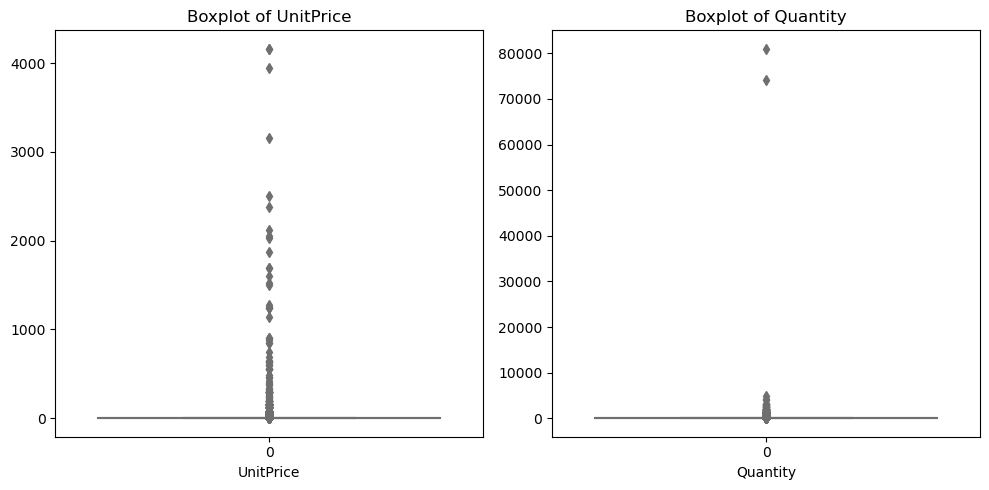

In [74]:
def check_outliers(dataframe, variable, ax):
    sns.boxplot(dataframe[variable],color='skyblue', ax=ax)
    ax.set_title('Boxplot of '+variable)
    ax.set_xlabel(variable)

columns = ['UnitPrice', 'Quantity']
fig, axs = plt.subplots(1, len(columns), figsize=(10, 5))

for i, col in enumerate(columns):
    check_outliers(df, col, axs[i])

plt.tight_layout()
plt.show()

### Removing Outliers

In [75]:
def remove_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    outliers = (data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))
    return outliers

outliers = remove_outliers(df['UnitPrice'])
df=df[~outliers]

# Data Visualisation

### Bar Plot of Frequency of Customers over Country

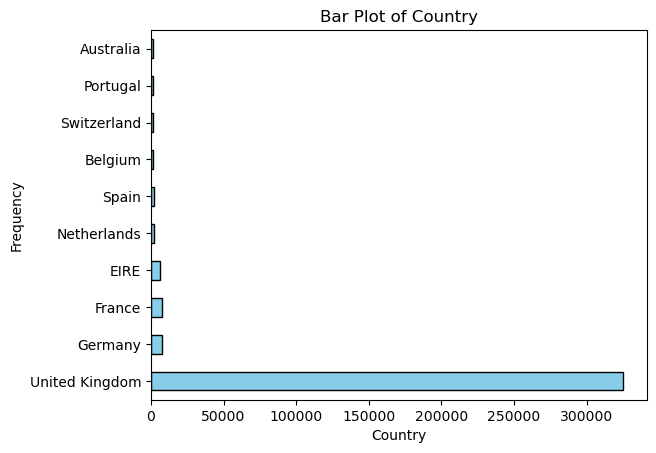

In [76]:
df['Country'].value_counts().head(10).plot(kind='barh', color='skyblue', edgecolor='black')
plt.title('Bar Plot of Country')
plt.xlabel('Country')
plt.ylabel('Frequency')
plt.show()

##### Inference:-
From this bar plot, we can infer the following:-
1. United Kingdom has the highest frequency: The United Kingdom appears over 300,000 times, making it the most frequent country compared to others.

2. Other countries have lower frequencies: Germany has the second-highest frequency, but it’s around 10,000 times, significantly lower than the United Kingdom.

### Scatter Plot of Quantity over UnitPrice

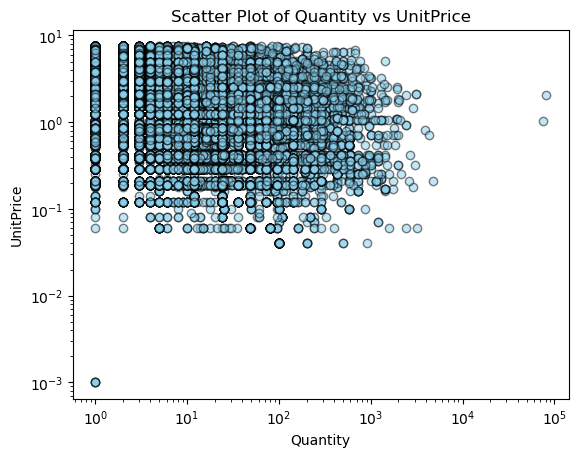

In [77]:
plt.scatter(df['Quantity'], df['UnitPrice'], color='skyblue', edgecolor='black', alpha=0.5)
plt.title('Scatter Plot of Quantity vs UnitPrice')
plt.xlabel('Quantity')
plt.ylabel('UnitPrice')

# Logarithmic Scale: Both axes are in logarithmic scale. This is done to visualize skewed distribution.
plt.xscale('log')
plt.yscale('log')
plt.show()

##### Inference:-
1. Outliers: There is 1 outliers on the lower left and 2 on upper right of the plot.

2. These represent transactions with Very Low Unit Price,Very Low Quantity & Very High Quantity.

### Time Series Plot of Quantity over InvoiceDate

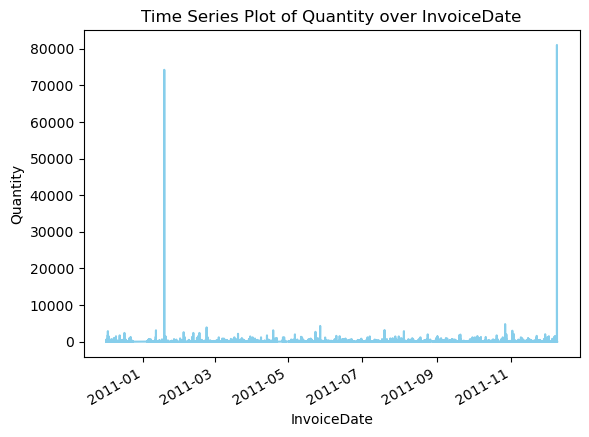

In [78]:
df.set_index('InvoiceDate')['Quantity'].plot(color='skyblue')
plt.title('Time Series Plot of Quantity over InvoiceDate')
plt.xlabel('InvoiceDate')
plt.ylabel('Quantity')
plt.show()

##### Inference:-
1. Consistent Sales: Most of the time, the quantity of items sold is relatively low and consistent. This suggests a steady demand for the products.

2. Sales Spikes: There are two large spikes in quantity sold, one in Jan-Feb 2011 and one after November 2011. These could be due to increased demand, promotional events, or other factors that increased sales during these periods.

## Cleaned DataSet

In [79]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France


# Collaborative Filtering

### Aggregating Purchase Quantities

In [80]:
# Sum 'Quantity' for each 'CustomerID' and 'StockCode' pair
df_agg = df.groupby(['CustomerID', 'StockCode'])['Quantity'].sum().reset_index()
df_agg

,CustomerID,StockCode,Quantity
0,12346,23166,74215
1,12347,16008,24
2,12347,17021,36
3,12347,20665,6
4,12347,20719,40
...,...,...,...
243733,18287,84920,4
243734,18287,85039A,96
243735,18287,85039B,120
243736,18287,85040A,48


### Creating Pivot Table

In [81]:
# Create a pivot table with users as rows and items as columns
pivot_table = df_agg.pivot(index='CustomerID', columns='StockCode', values='Quantity').fillna(0)
pivot_table

StockCode,10002,10080,10120,10123C,10124A,10124G,10125,10133,10135,11001,...,90214S,90214T,90214U,90214V,90214W,90214Y,90214Z,BANK CHARGES,M,PADS
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12347,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12348,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12349,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12350,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18280,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18281,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18282,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Conversion to Sparse Matrix

In [82]:
# Convert the pivot table to a sparse matrix
matrix = csr_matrix(pivot_table.values)
matrix

<4306x3417 sparse matrix of type '<class 'numpy.float64'>'
	with 243738 stored elements in Compressed Sparse Row format>

### K Nearest Neighbour - Cosine Similarity

In [83]:
# Fit the KNN model to data
model_knn = NearestNeighbors(metric='cosine', algorithm='brute')
model_knn.fit(matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

# Recommend Function

In [84]:
def recommend_items(user_id, date, n_recommendations=5):
    # Input validation
    if not isinstance(n_recommendations, int) or n_recommendations <= 0:
        print("n_recommendations must be a positive integer.")
        return
    
    # Handle missing values
    if pivot_table.isnull().any().any() or df.isnull().any().any():
        print("Data contains missing values.")
        return
    
    # Check if user_id exists in the data else return
    if user_id not in pivot_table.index:
        print(f"User ID {user_id} does not exist in the data.")
        return
    
    # Check if date is within range else return
    min_date=df['InvoiceDate'].min().date()
    max_date=df['InvoiceDate'].max().date()
    
    if not min_date <= date <= max_date:
        min_date = min_date.strftime("%d-%m-%Y")
        max_date = max_date.strftime("%d-%m-%Y")
        print(f"Date is out of range. Please choose a date between {min_date} and {max_date}.")
        return
    
    try:
        # Get the top n similar users for a given user
        distances,indices=model_knn.kneighbors(pivot_table.loc[user_id].values.reshape(1,-1),n_neighbors=n_recommendations+1)
        
        recommended_items = []
        
        # Get recommendations from similar users
        for i in range(1, len(distances.flatten())):
            similar_user_id = pivot_table.index[indices.flatten()[i]]
            purchases_by_similar_user = df[(df['CustomerID'] == similar_user_id) & (df['InvoiceDate'].dt.date == date)]
            
            # If no purchases on the given date, get the most popular items purchased by the similar user
            if purchases_by_similar_user.empty:
                purchases_by_similar_user = df[df['CustomerID'] == similar_user_id]
            
            for _, row in purchases_by_similar_user.iterrows():
                item = (row['StockCode'], row['Description'])
                if item not in recommended_items:
                    recommended_items.append(item)
                    
        if not recommended_items:
            print("No recommendations found.")
            return
        
        return recommended_items[:n_recommendations]
    
    except Exception as e:
        print(f"An error occurred: {e}")

# Testing the Function

In [85]:
# Enter Date Here (Choose a date between 01-12-2010 and 09-12-2011)
date_string = "01-12-2010"

#Some most frequent customers:- 17841, 14911, 14096, 12748, 14606, 15311, 14646, 13089, 13263, 14298
#Some least frequent customers:- 14795, 13366, 18084, 13120, 17443, 15562, 15216, 17382, 15389, 16073
#Enter CustomerID Here
cid=16073

# Extract date
date_object = datetime.strptime(date_string, "%d-%m-%Y").date()

output = recommend_items(cid,date_object)

if output:
    for i, item in enumerate(output, start=1):
        print(f"{i}):")
        print(f"Stock Code: {item[0]}")
        print(f"Description: {item[1]}\n")

1):
Stock Code: 21288
Description: STRIPEY CHOCOLATE NESTING BOXES

2):
Stock Code: 22084
Description: PAPER CHAIN KIT EMPIRE

3):
Stock Code: 22499
Description: WOODEN UNION JACK BUNTING

4):
Stock Code: 22360
Description: GLASS JAR ENGLISH CONFECTIONERY

5):
Stock Code: 84879
Description: ASSORTED COLOUR BIRD ORNAMENT

